#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [2]:
df = pd.read_csv('/content/WF(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,1.580600e+04,LWF,Y. Otsu,Jubilo Iwata,Japan,180,73,32,72,...,51,55,54,40,40,40,40,40,80,3.4
1,1,1.680000e+04,LWF,T. Minamino,AS Monaco,Japan,174,67,27,74,...,45,59,56,40,40,40,40,40,86,14.0
2,2,3.698600e+04,LWF,Gervinho,Free Agents,Côte d'Ivoire,179,68,35,81,...,43,45,44,40,40,40,40,40,86,0.0
3,3,3.699800e+04,LWF,E. Hazard,Free Agents,Belgium,173,76,31,78,...,42,48,51,40,40,40,40,40,90,51.0
4,4,3.811500e+04,LWF,Lautaro Acosta,CA Lanús,Argentina,171,65,34,74,...,53,60,51,40,40,40,40,40,85,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,446,1.055940e+14,RWF,Raphinha,FC Barcelona,Brazil,176,68,26,79,...,44,69,56,40,40,40,40,40,93,0.0
981,447,1.055950e+14,RWF,S. Gnabry,FC Bayern München,Germany,176,77,27,82,...,54,58,60,40,40,40,40,40,94,0.0
982,448,1.066530e+14,RWF,R. Mahrez,Free Agents,Algeria,179,67,31,81,...,46,49,54,40,40,40,40,40,96,0.0
983,449,2.990680e+14,RWF,L. Messi,Free Agents,Argentina,170,72,31,90,...,46,51,51,40,40,40,40,40,99,0.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [3]:

df = pd.read_csv('/content/WF(1).csv')

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)





In [4]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,180,73,32,72,82,81,77,66,67,62,...,51,51,55,54,40,40,40,40,40,80
1,174,67,27,74,83,85,80,67,64,71,...,43,45,59,56,40,40,40,40,40,86
2,179,68,35,81,82,87,79,66,64,70,...,41,43,45,44,40,40,40,40,40,86
3,173,76,31,78,90,93,89,73,71,72,...,41,42,48,51,40,40,40,40,40,90
4,171,65,34,74,82,84,79,69,68,67,...,46,53,60,51,40,40,40,40,40,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,176,68,26,79,86,89,82,66,73,73,...,42,44,69,56,40,40,40,40,40,93
981,176,77,27,82,86,92,86,79,74,77,...,52,54,58,60,40,40,40,40,40,94
982,179,67,31,81,94,95,91,77,83,78,...,44,46,49,54,40,40,40,40,40,96
983,170,72,31,90,94,95,94,84,83,90,...,45,46,51,51,40,40,40,40,40,99


# EXPLORATORY DATA ANALYSIS

<Axes: >

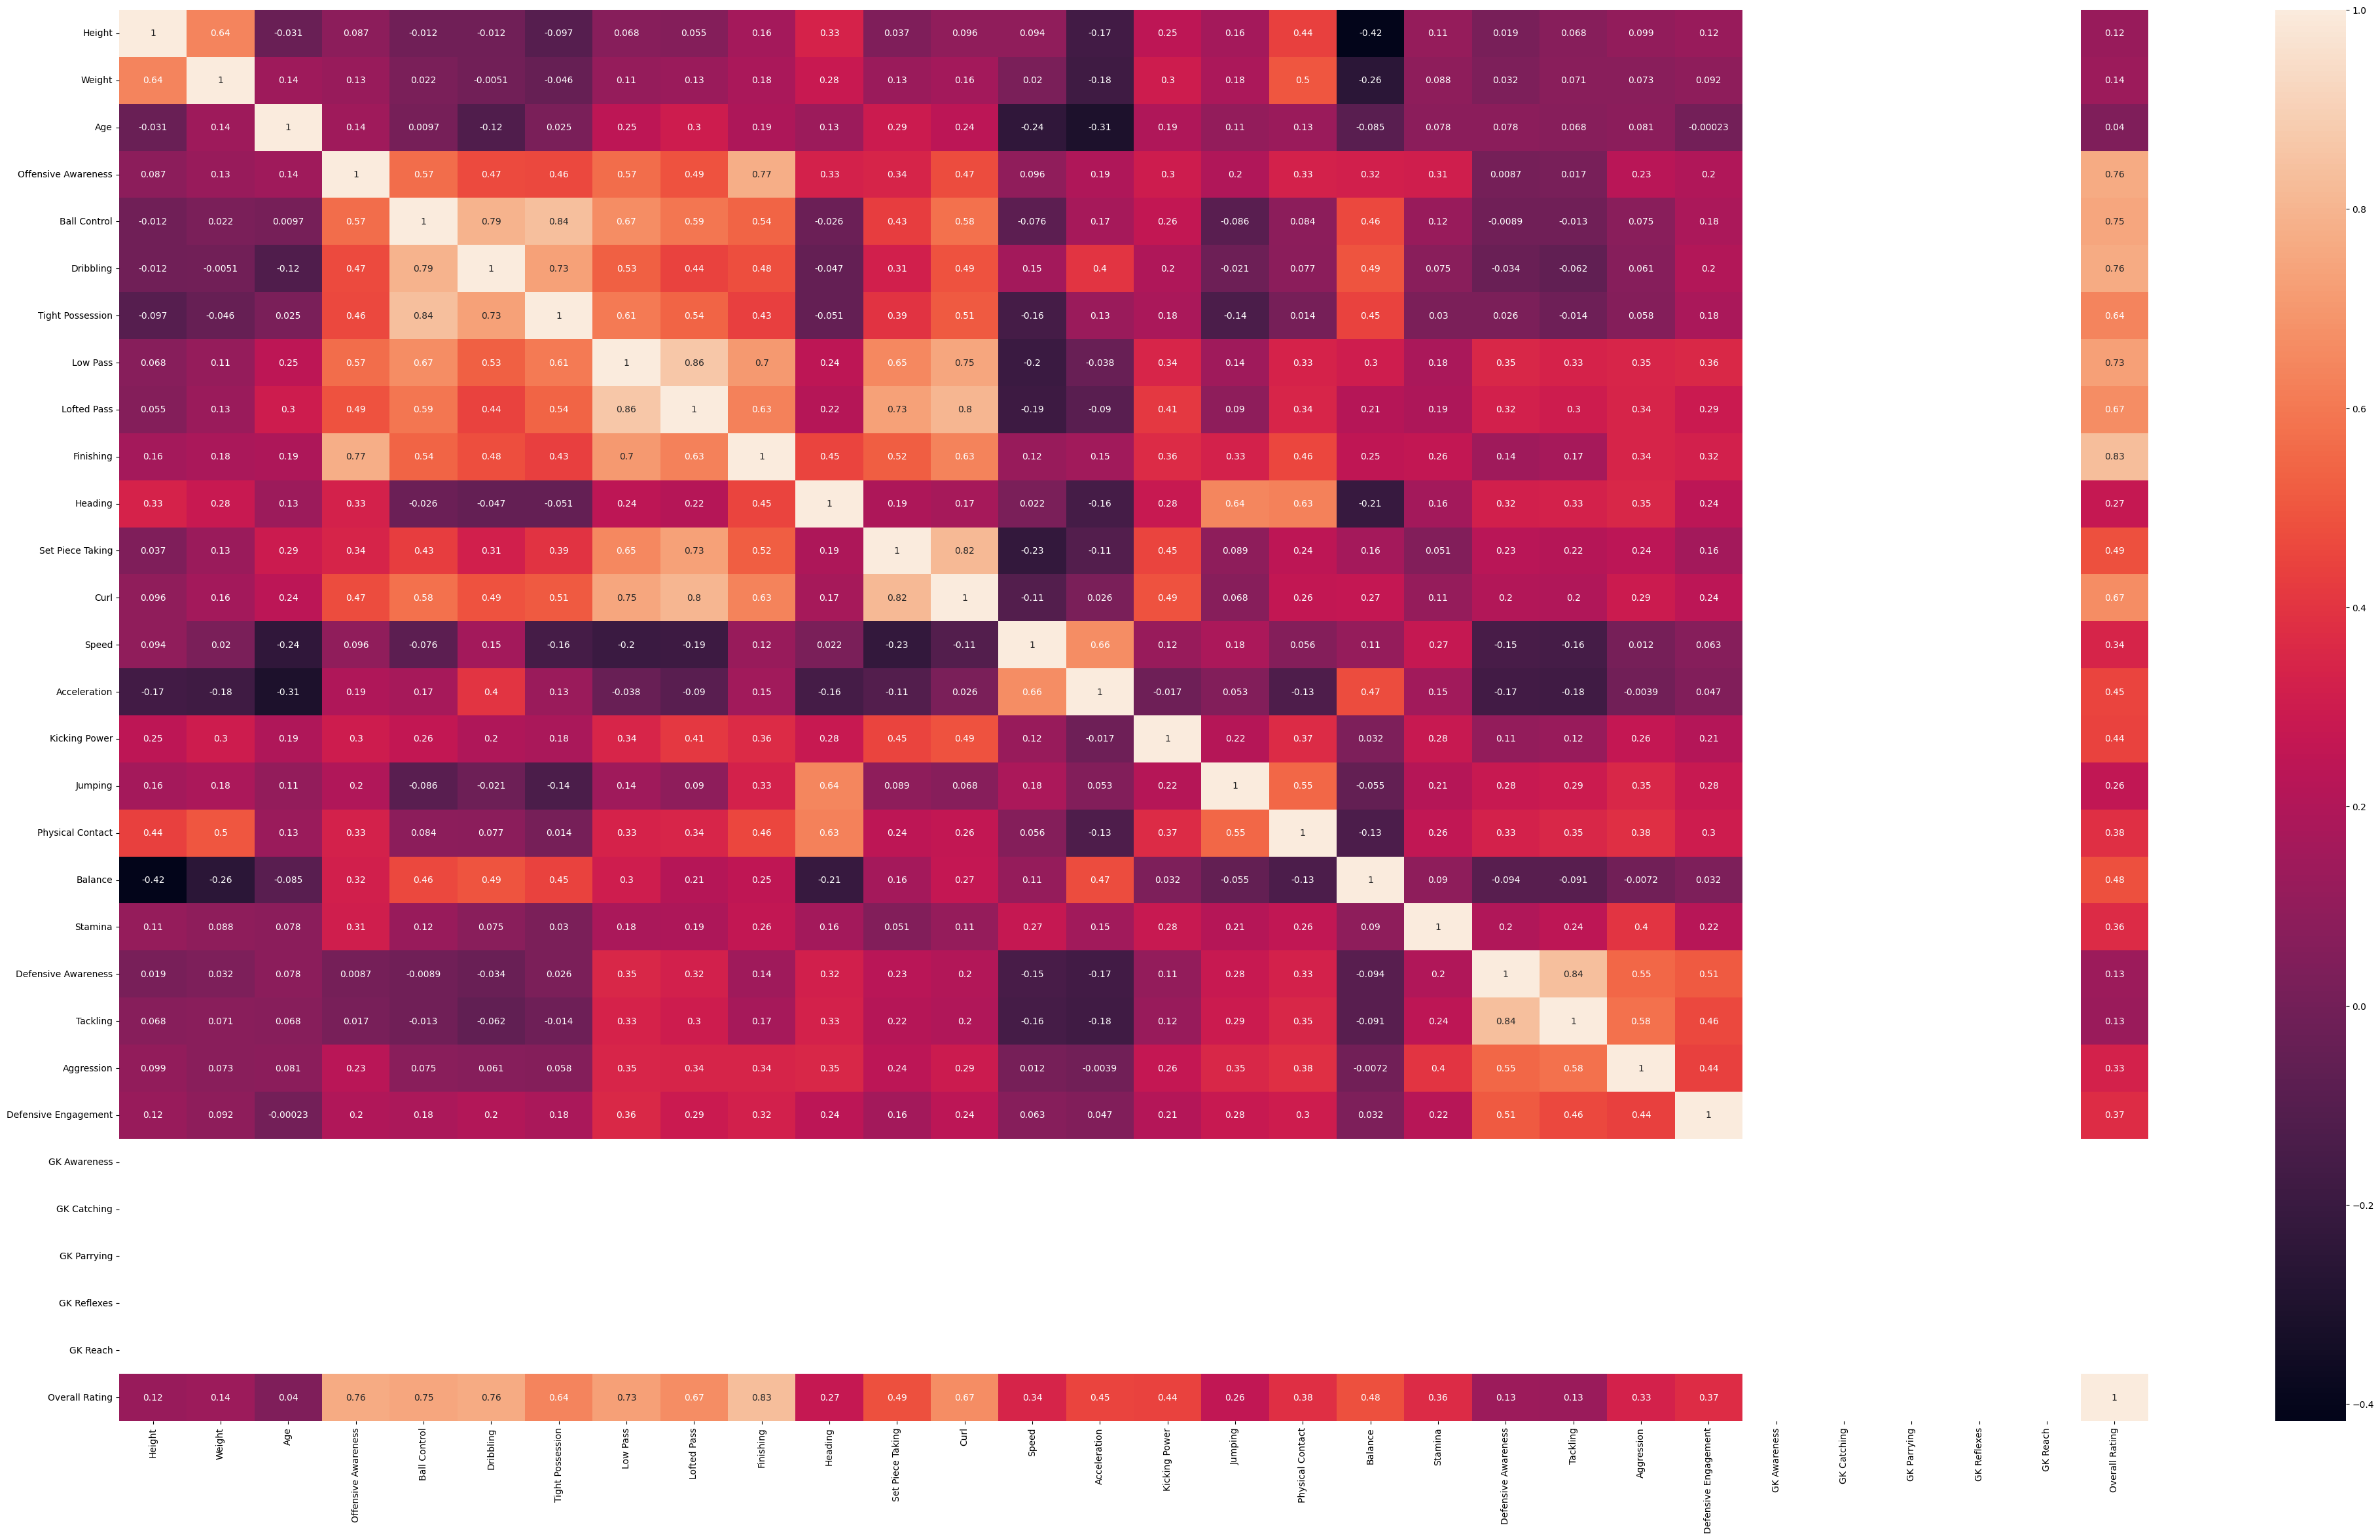

In [5]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [6]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='Offensive Awareness', ylabel='Overall Rating'>

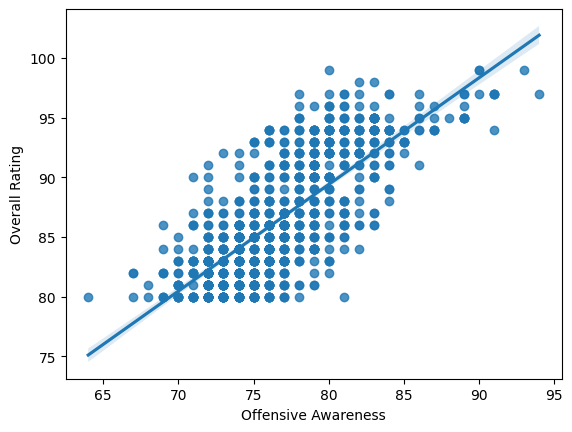

In [7]:
sns.regplot(data = df, x = 'Offensive Awareness', y = 'Overall Rating')

<Axes: xlabel='Finishing', ylabel='Overall Rating'>

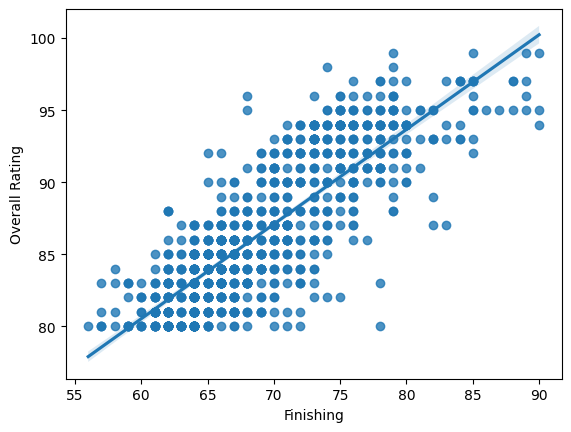

In [8]:
sns.regplot(data = df, x = 'Finishing', y = 'Overall Rating')

<Axes: xlabel='Dribbling', ylabel='Overall Rating'>

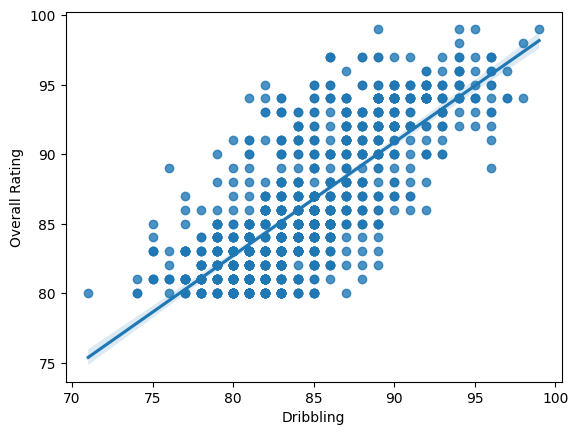

In [12]:
sns.regplot(data = df, x = 'Dribbling', y = 'Overall Rating')

Offensive Awareness Finishing and Dribbling looks key stats for a Winger or Wing Forward

##Scaling And Train Test Split

In [13]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train= scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train.shape

(788, 27)

In [21]:
X_test.shape

(197, 27)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [24]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=8,epochs=200)

Epoch 1/200
99/99 [==============================] - 2s 5ms/step - loss: 6350.0059 - val_loss: 2781.8164
Epoch 2/200
99/99 [==============================] - 0s 3ms/step - loss: 442.2716 - val_loss: 137.7117
Epoch 3/200
99/99 [==============================] - 0s 3ms/step - loss: 131.4048 - val_loss: 125.1214
Epoch 4/200
99/99 [==============================] - 0s 3ms/step - loss: 115.1468 - val_loss: 100.6608
Epoch 5/200
99/99 [==============================] - 0s 3ms/step - loss: 98.8252 - val_loss: 83.3367
Epoch 6/200
99/99 [==============================] - 0s 3ms/step - loss: 79.6340 - val_loss: 62.8764
Epoch 7/200
99/99 [==============================] - 0s 3ms/step - loss: 57.3705 - val_loss: 42.5061
Epoch 8/200
99/99 [==============================] - 0s 3ms/step - loss: 39.3654 - val_loss: 32.1797
Epoch 9/200
99/99 [==============================] - 0s 3ms/step - loss: 26.7091 - val_loss: 21.7491
Epoch 10/200
99/99 [==============================] - 0s 3ms/step - loss: 20.3945

In [25]:
model.save('WF_stats_predictor.h5')

## Now Repeat This process for all other data sets

In [ ]:
#losses = pd.DataFrame(model.history.history)

<Axes: >

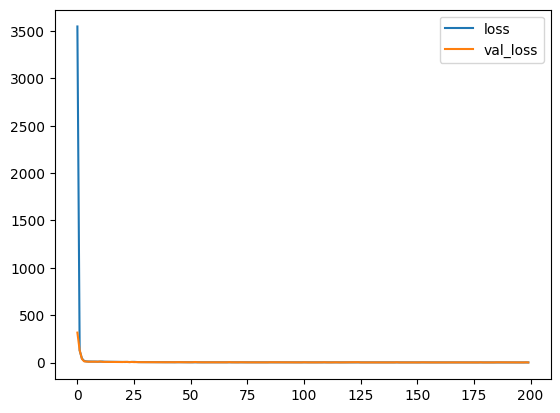

In [ ]:
#losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
#X_test

,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,Heading,Set Piece Taking,Curl,...,Stamina,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach
Height,,,,,,,,,,,,,,,,,,,,,
187,41,48,49,45,53,57,44,52,48,50,...,56,53,47,52,58,82,76,78,83,80
191,41,61,51,60,64,66,41,51,61,48,...,60,47,46,51,60,92,81,84,87,84
192,42,60,44,43,60,60,43,45,60,48,...,59,41,42,45,59,84,73,75,80,76
190,41,56,48,50,59,61,43,48,56,53,...,59,51,48,62,60,87,78,83,83,82
198,41,56,43,44,56,57,41,45,56,43,...,55,46,44,52,60,84,82,77,80,88
191,47,52,48,53,53,52,47,47,52,50,...,58,50,52,52,66,72,76,76,77,77
193,41,48,44,43,49,53,42,49,43,43,...,48,43,45,42,60,76,73,75,74,77
202,48,63,54,59,66,72,48,57,75,73,...,58,51,51,48,68,79,75,77,82,84
197,45,60,55,52,60,65,45,60,60,52,...,59,57,55,57,70,84,79,78,83,87


In [ ]:
#predictions = model.predict(X_test)

1/1 [==============================] - 0s 79ms/step


In [ ]:
#mean_absolute_error(y_test,predictions)

0.8091767834078881

In [ ]:
#model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 27)                729       
                                                                 
 dense_37 (Dense)            (None, 27)                756       
                                                                 
 dense_38 (Dense)            (None, 27)                756       
                                                                 
 dense_39 (Dense)            (None, 1)                 28        
                                                                 
Total params: 2,269
Trainable params: 2,269
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model.get_layer('dense_1').get_weights()

ValueError: ignored

###Predicting On a New Player

In [ ]:
#pl = df.drop('Overall Rating',axis=1).iloc[900]

In [ ]:
#pl = scaler.transform(pl.values.reshape(-1,26))

In [ ]:
#pl

In [ ]:
#model.predict(pl)

In [ ]:
#df.iloc[900]

In [ ]:
#model.get_weights()

In [ ]:
#df

In [ ]:
new_row = [83,84,93,82,73,71,84,71,66,78,92,92,83,75,83,87,79,50,52,63,58,40,40,40,40,40,40]
newDF.append(pd.Series(new_row, index=newDF.columns[:len(new_row)]), ignore_index=True)

df.append([83,84,93,82,73,71,84,71,66,78,92,92,83,75,83,87,79,50,52,63,58,40,40,40,40,40,40])

In [ ]:
model.save('cf_stats_predictor.h5')